# Importing Libraries

In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
import joblib
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
DATADIR="/content/drive/MyDrive/Ai Training MetaPi/Week_6_Deep_Learning/W6_D3_CNN/flowers"

In [8]:
IMG_SIZE=180

In [9]:
categories=['daisy','dandelion','rose','sunflower','tulip']

/content/drive/MyDrive/Ai Training MetaPi/Week_6_Deep_Learning/W6_D3_CNN/flowers/daisy
(313, 500, 3)


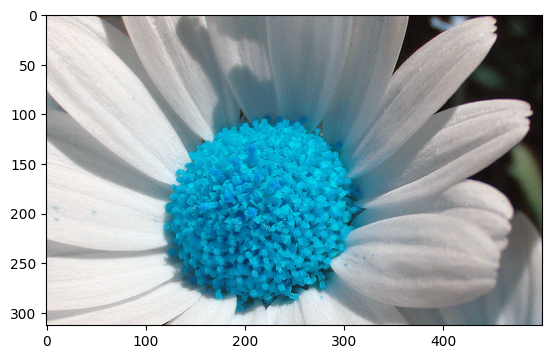

In [10]:
for category in categories:
  path=os.path.join(DATADIR,category)
  print (path)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img))
    print (img_array.shape)
    plt.imshow(img_array)
    plt.show()
    break
  break


In [ ]:
from tqdm import tqdm
data=[]
def create_data():
  for category in categories:
    path=os.path.join(DATADIR,category)
    class_num=categories.index(category)
    print (path)
    for img in tqdm(os.listdir(path)):
      try:
        img_array=cv2.imread(os.path.join(path,img))
        new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        data.append([new_array, class_num])
      except Exception as e:
        pass
create_data()

In [12]:
np.shape(data)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


(4323, 2)

In [ ]:
X=[]
Y=[]
for features,labels in tqdm(data):
  X.append(features)
  Y.append(labels)

In [14]:
X=np.array(X)
Y=np.array(Y)

#Splitting the Data

In [15]:
x_train, x_test, y_train, y_test,= train_test_split(X,Y, test_size=0.15,random_state=100)

# Building CNN

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential

# Define the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='Same', activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer

model.add(Conv2D(filters=64,kernel_size=(3,3),padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

# Third convolutional layer
model.add(Conv2D(filters=96,kernel_size=(3,3),padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
# Fourth convolutional layer
model.add(Conv2D(filters=96,kernel_size=(3,3),padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation='softmax'))

# Build the model
model.build(input_shape=(None, 128, 128, 3))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 96)       0

# Data Augmentation

In [17]:
datagen=ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,
    interpolation_order=1,
    dtype=None
)
datagen.fit(x_train)

# Training the model

In [20]:
history=model.fit(datagen.flow(x_train,y_train,batch_size=128),epochs=30,
                  validation_data=(x_test,y_test),steps_per_epoch=x_train.shape[0]//128)

Epoch 1/30
28/28 [==============================] - 44s 1s/step - loss: 23.1340 - accuracy: 0.2778 - val_loss: 1.4907 - val_accuracy: 0.3390
Epoch 2/30
28/28 [==============================] - 29s 1s/step - loss: 1.4815 - accuracy: 0.3426 - val_loss: 1.5983 - val_accuracy: 0.3051
Epoch 3/30
28/28 [==============================] - 31s 1s/step - loss: 1.4463 - accuracy: 0.3700 - val_loss: 1.3007 - val_accuracy: 0.4299
Epoch 4/30
28/28 [==============================] - 29s 1s/step - loss: 1.3342 - accuracy: 0.4334 - val_loss: 1.3044 - val_accuracy: 0.4284
Epoch 5/30
28/28 [==============================] - 28s 1s/step - loss: 1.2372 - accuracy: 0.4814 - val_loss: 1.2729 - val_accuracy: 0.4900
Epoch 6/30
28/28 [==============================] - 30s 1s/step - loss: 1.1698 - accuracy: 0.5096 - val_loss: 1.0608 - val_accuracy: 0.5686
Epoch 7/30
28/28 [==============================] - 29s 997ms/step - loss: 1.0690 - accuracy: 0.5569 - val_loss: 1.1021 - val_accuracy: 0.5439
Epoch 8/30
28/28

# Evaluation

In [21]:
test_loss, test_acc= model.evaluate(x_test,y_test)
print(f"Test Accuracy: {test_acc}")

21/21 [==============================] - 0s 14ms/step - loss: 0.8121 - accuracy: 0.7165
Test Accuracy: 0.716486930847168
